### By:
##### Karthik Bhat Beedubail
##### Date: 16 April 2024

### a) Introduction
Floods are among the most devastating natural disasters, causing significant damage to infrastructure, ecosystems, and community life globally. New Brunswick has frequently faced such challenges, particularly in areas surrounding the Saint John River, indicating a pressing need for effective flood forecasting techniques. This project seeks to leverage historical and geographic data to enhance the prediction of flood likelihood in specific regions of New Brunswick, thereby aiding in flood risk management, enhancing emergency preparedness, and guiding urban planning initiatives.

#### Objectives

To create a robust model for predicting flood susceptibility using data on past flood events, terrain characteristics, and land usage.
To generate a geographical depiction of flood risk areas to support strategic planning and implementation of flood mitigation measures.

#### Data Overview
The data to be used in this project includes:

- Historical Flood Events: Sourced from the Floods in Canada – Cartographic Product Collection by Natural Resources Canada (NRCan).
- Precipitation Data: Historical climate data that will help quantify the influence of rainfall on flooding.
Approach

The project will employ Decision Tree and Geospatial Analysis within a Jupyter Notebook, adhering to the stages of the Knowledge Discovery in Databases (KDD) process. It will cover everything from data gathering and cleaning to model development, validation, and deployment in visualizing predictions on interactive maps.

#### How it could be used?

This initiative is poised to significantly bolster the resilience of communities in New Brunswick by improving predictions of flood occurrences. This enhanced forecasting capability will allow for proactive approaches to diminish the effects of flooding.

## KDD PROCESS
The Knowledge Discovery in Databases (KDD) process is a structured approach used to extract useful knowledge from large volumes of data. Here are the eight phases of the KDD process:

- Develop an Understanding of the Application Domain: This involves gaining insights into the specific field of application, understanding relevant existing knowledge, and clarifying the goals of the end-user.
- Select a Dataset: Identify and choose the specific datasets on which the data discovery will be performed.
- Data Preprocessing: This step includes tasks such as dimensionality reduction, data cleaning, and data transformation to prepare the data for analysis.
- Choosing the Appropriate Task: Determine what type of data mining task is most suitable for the problem at hand, such as classification, regression, clustering, or summarization.
- Choosing the Algorithm: Select the appropriate algorithms that will be used for data analysis based on the task defined.
- Employing the Algorithm: Apply the chosen algorithm(s) to perform the data mining.
- Evaluate and Interpret the Mined Patterns: Assess the results obtained from the data mining process and interpret the patterns in the context of the application domain.
- Deployment and Documentation: Deploy the discovered knowledge for end-user applications and document the findings and the process for future reference.

In our Assignment we have already covered the first phase with our introduction, where we developed an understanding of the flooding issues in New Brunswick, defined our goals, and established the background knowledge needed for the project. Now, we will move on to the second phase, which involves selecting and detailing the datasets we will use for our analysis. This will set the stage for the subsequent steps, starting with data preprocessing, where we will prepare our datasets for in-depth analysis.

## PHASE 2 Selecting Dataset
In this phase of our Knowledge Discovery in Databases (KDD) process for the flood vulnerability assessment project in New Brunswick, we focus on the selection and procurement of critical datasets that will inform our predictive modeling. The datasets chosen are pivotal for accurately forecasting flood events based on historical data and geographical characteristics.

## b) Flood Event Data - Dependent variable 
The primary dataset includes historical records of flood events specifically sourced from Natural Resources Canada (NRCan). This valuable dataset is available through the NRCan Open Data portal:

- Source: Natural Resources Canada - Flood Event Data
- Format: GeoDatabase (GDB)
- Content: The dataset contains comprehensive historical records of flood occurrences.
- Projection: The data within the GDB is formatted in the EPSG:2953 coordinate reference system, which is standard for geographical data in Canada.

### Procedure for Data Acquisition and Preparation:

- Download: Initially, the dataset will be downloaded in a compressed (ZIP) format from the Open Data portal.
- Extraction: After downloading, the ZIP file will be extracted to access the GDB files.
- Loading: The extracted data will be loaded into our analytical environment, ensuring it is correctly aligned with the EPSG:2953 projection for accurate spatial analysis.

## c) Precipitation Data - Independent Variable
The second dataset entails historical precipitation data, which is a critical independent variable in modeling flood susceptibility. This data is accessed through the Meteorological Service of Canada's API.

- Source: Meteorological Service of Canada - Historical Climate Data
- Format: GeoJSON
- Content: The dataset provides historical climate data, with a focus on precipitation measurements which are crucial for understanding the conditions leading up to flood events.

Precipitation is a fundamental component of the hydrological cycle, exerting a significant impact on the occurrence and severity of flood events. It is vital to incorporate historical precipitation patterns into our flood susceptibility model for several reasons:

- Direct Influence: Precipitation directly contributes to flood generation by increasing water volumes in rivers, lakes, and other water bodies. Particularly in regions like New Brunswick, where riverine flooding is common, the amount of rainfall can be a primary driver of flood events.

- Understanding Extremes: Historical data on extreme weather events, including heavy rainfall, is crucial for understanding past instances that have led to significant flooding. This information helps in identifying patterns or thresholds of rainfall that are likely to result in floods, enhancing the predictive accuracy of our model.

- Model Enhancement: Incorporating precipitation data allows us to refine our model’s predictive capabilities. By understanding how different levels of precipitation interact with geographical and topographical factors, we can better predict the susceptibility of specific areas to flooding under similar future conditions.

### Procedure for Data Access and Processing:

- Access: Utilize the API provided by the Meteorological Service of Canada to query the required precipitation data.
- Processing: Once accessed, the data in GeoJSON format will be processed to extract relevant features.
- Integration: The processed data will then be integrated with the flood event data to enrich the analysis and improve the accuracy of the predictive model.

In [88]:
# For downloading data and handling operating system path
import os
import urllib.request
from urllib.request import Request, urlopen # URL handling for data download
from urllib.error import HTTPError, URLError # Handle HTTP error

## b) Flood Event Data - Dependent variable 
The primary dataset includes historical records of flood events specifically sourced from Natural Resources Canada (NRCan). This valuable dataset is available through the NRCan Open Data portal:

- Source: Natural Resources Canada - Flood Event Data
- Format: GeoDatabase (GDB)
- Content: The dataset contains comprehensive historical records of flood occurrences.
- Projection: The data within the GDB is formatted in the EPSG:2953 coordinate reference system, which is standard for geographical data in Canada.

### Procedure for Data Acquisition and Preparation:

- Download: Initially, the dataset will be downloaded in a compressed (ZIP) format from the Open Data portal.
- Extraction: After downloading, the ZIP file will be extracted to access the GDB files.
- Loading: The extracted data will be loaded into our analytical environment, ensuring it is correctly aligned with the EPSG:2953 projection for accurate spatial analysis.


In [14]:
# Define the URL for the flood data and the path where it will be saved
flood_data_url = 'https://data.eodms-sgdot.nrcan-rncan.gc.ca/public/EGS/EGS_FGP_Geodatabases/Flood_Inondation/archive_archives/EGS_Flood_Product_Archive.gdb.zip'
zip_path = 'FLOOD_Data.gdb.zip'

# Directory to store and extract flood data
flood_data_location = "FLOOD_DATA_FILES"


os.makedirs(flood_data_location, exist_ok=True) # Assert that the directory exists

# Download the GeoDatabase, GDB zip file from NRCan
print(f"Downloading flood data from (Please wait till download completes): {flood_data_url}")
print("Downloading....")
urllib.request.urlretrieve(flood_data_url, zip_path)
print("Download complete.")

# Extract the contents
print(f"Extracting files to: {flood_data_location}")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(flood_data_location)

print(f"Files has been extracted to: {flood_data_location}")

Downloading....
Download complete.
Extracting files to: FLOOD_DATA_FILES
Files has been extracted to: FLOOD_DATA_FILES


In [16]:
# Define the base path for flood data based on the previously used directory
flood_data_location = "FLOOD_DATA_FILES"

# Set the path to the extracted GeoDatabase (GDB) within the flood data directory
gdb_path = os.path.join(flood_data_location, 'EGS_Flood_Product_Archive.gdb')

# Load the GeoDataFrame from the GDB file
flood_data = gpd.read_file(gdb_path)

In [17]:
flood_data.head()

,Shape_Length,Shape_Area,product_file_name,version,confidence_level,swath_file_name,swath_id,event_type,country_code,subdivision_code_client,...,date_utc,datetime_utc_str,sensor_type,sensor_name,product_notes,datetime_publication_utc,package_url,is_active,class,geometry
0,2.320466e+06,3.784030e+08,Flood_CAN_NB_StJohn_20050501_102507.shp,1.0,Moderate,o01may05_8bit.pix,NB_Fredericton_20050501_102507,Flood,CAN,NB,...,2005-05-01 00:00:00+00:00,2005-05-01 10:25:07,SAR,RADARSAT-1,None,,https://data.eodms-sgdot.nrcan-rncan.gc.ca/pub...,0,0,MULTIPOLYGON Z (((-7405498.415 5722463.060 0.0...
1,2.737830e+06,9.889846e+08,Flood_CAN_NB_StJohn_20080503_221250.shp,1.0,Moderate,may03_08_8bit.tif,NB_Fredericton_20080503_221250,Flood,CAN,NB,...,2008-05-03 00:00:00+00:00,2008-05-03 22:12:50,SAR,RADARSAT-2,None,,https://data.eodms-sgdot.nrcan-rncan.gc.ca/pub...,0,0,MULTIPOLYGON Z (((-7357477.758 5706089.998 0.0...
2,3.528142e+06,1.128517e+09,Flood_CAN_NB_StJohn_20080504_102309.shp,1.0,Moderate,04May08_poly2_8bit.tif,NB_Fredericton_20080504_102309,Flood,CAN,NB,...,2008-05-04 00:00:00+00:00,2008-05-04 10:23:09,SAR,RADARSAT-2,None,,https://data.eodms-sgdot.nrcan-rncan.gc.ca/pub...,0,0,MULTIPOLYGON Z (((-7336734.628 5693777.502 0.0...
3,4.473244e+06,1.206043e+09,Flood_CAN_NB_StJohn_20080505_104103.shp,1.0,Moderate,sjnb_20080505_S1.tif,NB_Fredericton_20080505_104103,Flood,CAN,NB,...,2008-05-05 00:00:00+00:00,2008-05-05 10:41:03,SAR,RADARSAT-1,None,,https://data.eodms-sgdot.nrcan-rncan.gc.ca/pub...,0,1,MULTIPOLYGON Z (((-7361162.365 5655661.477 0.0...
4,4.590603e+06,3.417032e+08,Flood_CAN_NB_StJohn_20080505_104103.shp,1.0,Moderate,sjnb_20080505_S1.tif,NB_Fredericton_20080505_104103,Flood,CAN,NB,...,2008-05-05 00:00:00+00:00,2008-05-05 10:41:03,SAR,RADARSAT-1,None,,https://data.eodms-sgdot.nrcan-rncan.gc.ca/pub...,0,2,MULTIPOLYGON Z (((-7337232.844 5652087.662 0.0...


Using `subdivision_code_client` attribute we will filter our data that come under New Brunswick (i.e 'NB')

In [18]:
# Filter the data for New Brunswick (NB) and indicate flood events with a 'flood' column
flood_data_NB_gdf = flood_data[flood_data['subdivision_code_client'] == 'NB']
flood_data_NB_gdf['flood'] = 1  # Add a binary 'flood' indicator column

# Select relevant columns and convert the Coordinate Reference System (CRS) to EPSG:2953 for New Brunswick
flood_data_NB_gdf = flood_data_NB_gdf[['flood', 'geometry']].to_crs(epsg=2953)

# Display the filtered and processed DataFrame
flood_data_NB_gdf.head()

,flood,geometry
0,1,MULTIPOLYGON Z (((2498072.311 7404147.634 0.00...
1,1,MULTIPOLYGON Z (((2531762.984 7392788.411 0.00...
2,1,MULTIPOLYGON Z (((2546381.659 7384263.234 0.00...
3,1,MULTIPOLYGON Z (((2529343.348 7357409.334 0.00...
4,1,MULTIPOLYGON Z (((2546247.516 7354997.163 0.00...


<Axes: >

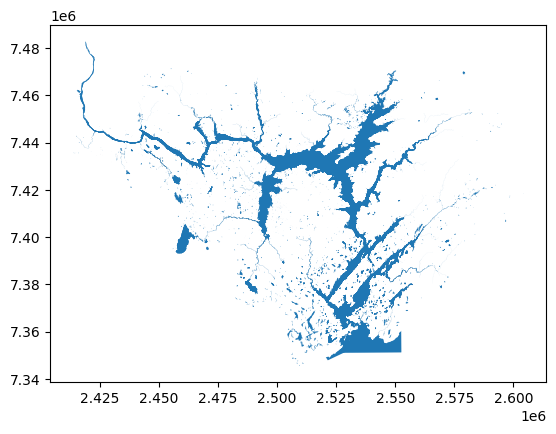

In [19]:
flood_data_NB_gdf.plot()

In [30]:
flood_data_NB_gdf.crs

<Projected CRS: EPSG:2953>
Name: NAD83(CSRS) / New Brunswick Stereographic
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Canada - New Brunswick.
- bounds: (-69.05, 44.56, -63.7, 48.07)
Coordinate Operation:
- name: New Brunswick Stereographic (NAD83)
- method: Oblique Stereographic
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
# Save the processed data as GeoJSON for easy access and visualization in GIS applications
flood_data_NB_gdf.to_file('flood_data_NB.geojson', driver='GeoJSON')

print("Processed GeoDataFrame saved as GeoJSON.")

Processed GeoDataFrame saved as GeoJSON.


In [52]:
from shapely.geometry import box
from shapely.ops import unary_union

<b>Now based on above plot, lets try to resstrict the study area to swan creek area. By visually you can identify xmin, ymin, xmax, ymax to create our bounding box. </b>

That is, when I plotted flood_data_NB_gdf I noticed that Swan creek is somewhere centre near Grand lake area. I manually reffered the map and defined bounding box coordinates 

In [28]:
# Define bounding box coordinates
xmin, ymin, xmax, ymax = 2.49e6, 7.42e6, 2.51e6, 7.44e6

# Create the bounding box
study_area_box = box(xmin, ymin, xmax, ymax)

# Now, clip the GeoDataFrame to the study area box
flood_data_NB_trimmed_gdf = gpd.clip(flood_data_NB_gdf, study_area_box)

<Axes: >

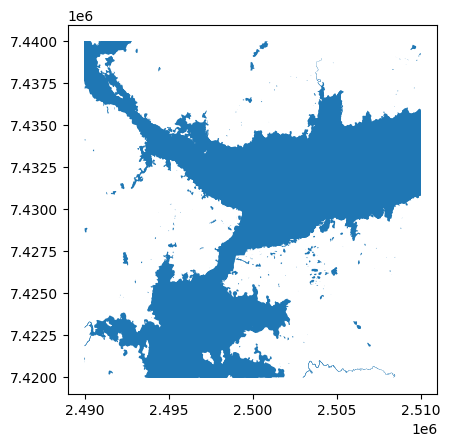

In [57]:
flood_data_NB_trimmed_gdf.plot()

## c) Precipitation Data - Independent Variable
The second dataset entails historical precipitation data, which is a critical independent variable in modeling flood susceptibility. This data is accessed through the Meteorological Service of Canada's API.

- Source: Meteorological Service of Canada - Historical Climate Data
- Format: GeoJSON
- Content: The dataset provides historical climate data, with a focus on precipitation measurements which are crucial for understanding the conditions leading up to flood events.

<u>Why it was Selected</u>?

Precipitation is a fundamental component of the hydrological cycle, exerting a significant impact on the occurrence and severity of flood events. It is vital to incorporate historical precipitation patterns into our flood susceptibility model for several reasons:

- Direct Influence: Precipitation directly contributes to flood generation by increasing water volumes in rivers, lakes, and other water bodies. Particularly in regions like New Brunswick, where riverine flooding is common, the amount of rainfall can be a primary driver of flood events.

- Understanding Extremes: Historical data on extreme weather events, including heavy rainfall, is crucial for understanding past instances that have led to significant flooding. This information helps in identifying patterns or thresholds of rainfall that are likely to result in floods, enhancing the predictive accuracy of our model.

- Model Enhancement: Incorporating precipitation data allows us to refine our model’s predictive capabilities. By understanding how different levels of precipitation interact with geographical and topographical factors, we can better predict the susceptibility of specific areas to flooding under similar future conditions.

### Procedure for Data Access and Processing:

- Access: Utilize the API provided by the Meteorological Service of Canada to query the required precipitation data.
- Processing: Once accessed, the data in GeoJSON format will be processed to extract relevant features.
- Integration: The processed data will then be integrated with the flood event data to enrich the analysis and improve the accuracy of the predictive model.

In [37]:
# API endpoint and parameters for fetching precipitation data
url = "https://api.weather.gc.ca/collections/ltce-precipitation/items"
params = {
    "f": "json",
    "lang": "en-CA",
    "limit": 10000,
    "PROVINCE_CODE": "NB"
}
headers = {"Accept": "application/geo+json"}

# Make the API request to obtain precipitation data
response = requests.get(url, params=params, headers=headers)
data = response.json()
precipitation_gdf = gpd.GeoDataFrame.from_features(data["features"], crs="EPSG:4326")

# Transform CRS EPSG:2953 to maintain consistency
precipitation_gdf = precipitation_gdf.to_crs(epsg=2953)

In [36]:
precipitation_gdf.head()

,geometry,LOCAL_DAY,FOURTH_PRECIPITATION,PROVINCE_CODE,RECORD_PRECIPITATION,FIFTH_PRECIPITATION_YEAR,THIRD_PRECIPITATION,SECOND_PRECIPITATION_YEAR,FIFTH_PRECIPITATION,WXO_CITY_CODE,...,IDENTIFIER,FIRST_PRECIPITATION_YEAR,FOURTH_PRECIPITATION_YEAR,VIRTUAL_STATION_NAME_F,THIRD_PRECIPITATION_YEAR,LOCAL_MONTH,VIRTUAL_STATION_NAME_E,SECOND_PRECIPITATION,PREV_RECORD_PRECIPITATION,RECORD_BEGIN
0,POINT (2635158.349 7498169.942),29,11.7,NB,21.3,1998,13.2,1973,10.2,NB-1,...,VSNB1VV-1-29,1975,1979,BOUCTOUCHE,1990,1,BOUCTOUCHE AREA,15.7,15.7,1965-10-15T00:00:00Z
1,POINT (2635158.349 7498169.942),5,10.7,NB,13.6,1969,11.2,1973,9.9,NB-1,...,VSNB1VV-4-5,2007,1979,BOUCTOUCHE,1981,4,BOUCTOUCHE AREA,11.7,11.7,1965-10-15T00:00:00Z
2,POINT (2635158.349 7498169.942),1,13.5,NB,44.5,1980,15.2,2001,6.0,NB-1,...,VSNB1VV-9-1,2008,1976,BOUCTOUCHE,1989,9,BOUCTOUCHE AREA,19.3,19.3,1965-10-15T00:00:00Z
3,POINT (2635158.349 7498169.942),20,20.6,NB,40.6,1974,24.1,2006,19.3,NB-1,...,VSNB1VV-10-20,1968,2011,BOUCTOUCHE,1977,10,BOUCTOUCHE AREA,27.8,5.1,1965-10-15T00:00:00Z
4,POINT (2635158.349 7498169.942),11,9.2,NB,28.4,1994,9.4,1987,8.2,NB-1,...,VSNB1VV-12-11,1973,2004,BOUCTOUCHE,1993,12,BOUCTOUCHE AREA,16.4,5.1,1965-10-15T00:00:00Z


### Clipping Precipitation Data
After successfully retrieving the precipitation data from the Meteorological Service of Canada, we took an important step to align this dataset with the specific geographic focus of our study. To do this, we utilized the clip function from GeoPandas, which acts like a pair of precise digital scissors, trimming the broader dataset down to just the relevant section we are interested in—the predefined study area.

In [38]:
precipitation_gdf_clipped = gpd.clip(precipitation_gdf, study_area_box)

In [40]:
precipitation_gdf_clipped.head()

,geometry,LOCAL_DAY,FOURTH_PRECIPITATION,PROVINCE_CODE,RECORD_PRECIPITATION,FIFTH_PRECIPITATION_YEAR,THIRD_PRECIPITATION,SECOND_PRECIPITATION_YEAR,FIFTH_PRECIPITATION,WXO_CITY_CODE,...,IDENTIFIER,FIRST_PRECIPITATION_YEAR,FOURTH_PRECIPITATION_YEAR,VIRTUAL_STATION_NAME_F,THIRD_PRECIPITATION_YEAR,LOCAL_MONTH,VIRTUAL_STATION_NAME_E,SECOND_PRECIPITATION,PREV_RECORD_PRECIPITATION,RECORD_BEGIN
9079,POINT (2501553.568 7426642.735),24,48.8,NB,70.4,1938,48.8,1896,46.0,NB-11,...,VSNB11V-10-24,1933,1990,OROMOCTO,1876,10,OROMOCTO AREA,51.3,51.3,1871-12-01T00:00:00Z
9080,POINT (2501553.568 7426642.735),26,27.9,NB,41.1,1951,32.8,1933,21.6,NB-11,...,VSNB11V-12-26,1976,1915,OROMOCTO,1975,12,OROMOCTO AREA,33.0,33.0,1871-12-01T00:00:00Z
4894,POINT (2501553.568 7426642.735),11,21.5,NB,88.6,1980,23.9,1991,21.1,NB-11,...,VSNB11V-10-11,1900,2018,OROMOCTO,1954,10,OROMOCTO AREA,25.2,13.2,1871-12-01T00:00:00Z
4893,POINT (2501553.568 7426642.735),2,22.9,NB,31.2,1888,28.2,1989,19.8,NB-11,...,VSNB11V-5-2,1915,1983,OROMOCTO,1918,5,OROMOCTO AREA,30.6,19.8,1871-12-01T00:00:00Z
1401,POINT (2501553.568 7426642.735),20,15.7,NB,22.6,1899,17.0,1936,15.2,NB-11,...,VSNB11V-12-20,2023,1939,OROMOCTO,1903,12,OROMOCTO AREA,19.8,19.8,1871-12-01T00:00:00Z


### Cleaning and Saving Processed Precipitation Data

I am considering RECORD_PRECIPITATION and PREV_RECORD_PRECIPITATION colums here.

- RECORD_PRECIPITATION: Since precipitation is a direct and primary factor contributing to flooding, this variable is crucial for any flood prediction model.
- PREV_RECORD_PRECIPITATION: Understanding prior precipitation can help in assessing ground saturation levels, which significantly influence flood risk. For example, if the ground is already saturated from previous rainfall, even a moderate rain could lead to flooding.

We'll see if there are any missing data. We'll fill missing data with the median value.

In [42]:
# Select relevant columns for the analysis
columns_to_keep = [
    'geometry',
    'RECORD_PRECIPITATION',
    'PREV_RECORD_PRECIPITATION'
]
precipitation_NB_final = precipitation_gdf_clipped[columns_to_keep].copy()

In [44]:
# Check for missing values in the data
missing_values = precipitation_NB_final.isna().sum()
print("Missing values before cleaning:", missing_values)

Missing values before cleaning: geometry                     0
RECORD_PRECIPITATION         0
PREV_RECORD_PRECIPITATION    4
dtype: int64


In [45]:
# Fill missing values for 'PREV_RECORD_PRECIPITATION' with the median value
prev_record_precip_median = precipitation_NB_final['PREV_RECORD_PRECIPITATION'].median()
precipitation_NB_final['PREV_RECORD_PRECIPITATION'].fillna(prev_record_precip_median, inplace=True)

In [47]:
# Check for missing values in the data after cleaning
missing_values = precipitation_NB_final.isna().sum()
print("\nMissing values after cleaning:", missing_values)


Missing values after cleaning: geometry                     0
RECORD_PRECIPITATION         0
PREV_RECORD_PRECIPITATION    0
dtype: int64


In [59]:
precipitation_NB_final.head()

,geometry,RECORD_PRECIPITATION,PREV_RECORD_PRECIPITATION
9079,POINT (2501553.568 7426642.735),70.4,51.3
9080,POINT (2501553.568 7426642.735),41.1,33.0
4894,POINT (2501553.568 7426642.735),88.6,13.2
4893,POINT (2501553.568 7426642.735),31.2,19.8
1401,POINT (2501553.568 7426642.735),22.6,19.8


In [49]:
# Save the cleaned GeoDataFrame as a GeoJSON for future use
precipitation_NB_final_file_path = 'precipitation_NB_final_cleaned.geojson'
precipitation_NB_final.to_file(precipitation_NB_final_file_path, driver='GeoJSON')
print(f"\nProcessed precipitation data is saved to: {precipitation_NB_final_file_path}\n ")


Processed precipitation data is saved to: precipitation_NB_final_cleaned.geojson
 


### Generate Non flood data

The creation of non_flood_data_NB_trimmed_gdf represents a deliberate step in our data preparation for decision tree analysis, providing a critical contrast to the flood_data_NB_trimmed_gdf. This contrast is essential for a few reasons:

- Decision trees excel in binary classification tasks. By having a clear delineation between flood (1) and non-flood (0) areas, the algorithm can learn the patterns that distinguish between the two classes, enhancing its predictive accuracy.

- The non-flood data introduces 'negative' examples, helping to identify which features are significant predictors of flooding. This is vital in decision tree learning, as it determines how to split the data at each node.

- Including non-flood data helps to prevent model bias. Without it, the model could become biased towards predicting floods if only flood data were present.

In [53]:
study_area_gdf = gpd.GeoDataFrame(geometry=[study_area_box], crs='EPSG:2953')
flood_data_NB_gdf['geometry'] = flood_data_NB_gdf.geometry.simplify(tolerance=0.01, preserve_topology=True).buffer(0)

# Clip the flood data to the study area
# flood_data_NB_trimmed_gdf = gpd.clip(flood_data_NB_gdf, study_area_gdf)

# Create a union of all flood geometries
union_flood = unary_union(flood_data_NB_trimmed_gdf.geometry)

# Subtract the flood areas from the study area to get the non-flood area
non_flood_geometry = study_area_box.difference(union_flood)

# Initialize the GeoDataFrame for non-flood areas and set 'flood' column to 0
non_flood_data_NB_trimmed_gdf = gpd.GeoDataFrame(geometry=[non_flood_geometry], crs='EPSG:2953')
non_flood_data_NB_trimmed_gdf['flood'] = 0  # Indicates these areas are not flooded

# Display the non-flood data GeoDataFrame
non_flood_data_NB_trimmed_gdf.head()

,geometry,flood
0,MULTIPOLYGON Z (((2510000.000 7420000.000 0.00...,0


<Axes: >

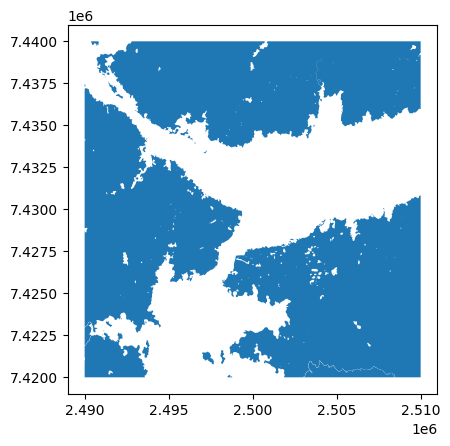

In [54]:
non_flood_data_NB_trimmed_gdf.plot()

# Data Visulaization

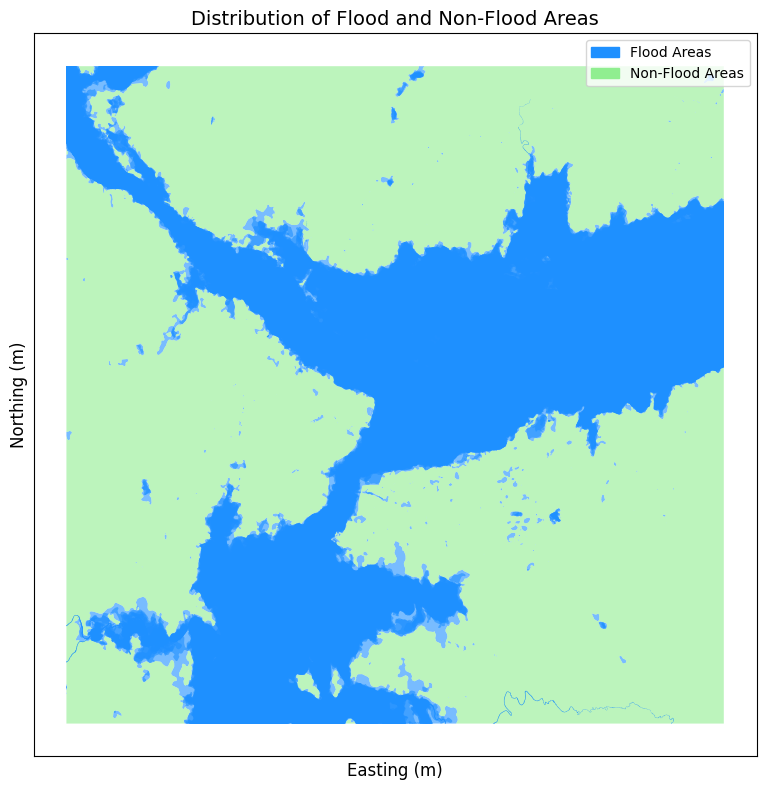

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the figure size and create the subplot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the trimmed flood data with specified color and alpha transparency
flood_data_NB_trimmed_gdf.plot(ax=ax, color='dodgerblue', alpha=0.6)

# Plot the trimmed non-flood data with another color and alpha transparency
non_flood_data_NB_trimmed_gdf.plot(ax=ax, color='lightgreen', alpha=0.6)

# Create custom legend handles
legend_handles = [
    mpatches.Patch(color='dodgerblue', label='Flood Areas'),
    mpatches.Patch(color='lightgreen', label='Non-Flood Areas')
]

# Add the legend to the plot
ax.legend(handles=legend_handles, loc='upper right')

# Enhance plot with title and axis labels
ax.set_title('Distribution of Flood and Non-Flood Areas', fontsize=14)
ax.set_xlabel('Easting (m)', fontsize=12)
ax.set_ylabel('Northing (m)', fontsize=12)

# Remove axes ticks
ax.set_xticks([])
ax.set_yticks([])

# Display the plot
plt.tight_layout()
plt.show()


### Data preperation
We will create a combined data to perform analysis. We will need to first merge or concatenate the flood and non-flood data, and then perform a spatial join with the precipitation data. This will ensure that your model training data includes both scenarios (flood and non-flood), which is essential for a balanced classification model like a decision tree or random forest.

Here's how we will proceed:

- Concatenate Flood and Non-Flood Data: This will combine both datasets into a single GeoDataFrame. Make sure both have the same columns (e.g., both should have a 'flood' column).
- Spatial Join with Precipitation Data: Perform a spatial join of this combined dataset with the precipitation data, using the nearest neighbor method to assign precipitation values to each geometry.

In [60]:
all_flood_data_gdf = gpd.GeoDataFrame(pd.concat([flood_data_NB_trimmed_gdf, non_flood_data_NB_trimmed_gdf], ignore_index=True))

In [61]:
# This will attach the nearest precipitation data point's attributes to each geometry in the all_flood_data_gdf
combined_data_gdf = gpd.sjoin_nearest(all_flood_data_gdf, precipitation_NB_final, how='left', distance_col="distance")

In [64]:
combined_data_gdf.head()

,flood,geometry,index_right,RECORD_PRECIPITATION,PREV_RECORD_PRECIPITATION,distance
0,1,MULTIPOLYGON Z (((2509918.962 7430856.374 0.00...,1400,34.0,4.8,1163.777279
0,1,MULTIPOLYGON Z (((2509918.962 7430856.374 0.00...,1399,40.6,27.4,1163.777279
0,1,MULTIPOLYGON Z (((2509918.962 7430856.374 0.00...,1398,45.4,37.2,1163.777279
0,1,MULTIPOLYGON Z (((2509918.962 7430856.374 0.00...,1397,22.1,16.5,1163.777279
0,1,MULTIPOLYGON Z (((2509918.962 7430856.374 0.00...,5183,60.2,31.8,1163.777279


In [65]:
# Drop the 'index_right' and 'distance' columns as they are not needed further
combined_data_gdf.drop(columns=['index_right', 'distance'], inplace=True)

In [66]:
combined_data_gdf.describe()

,flood,RECORD_PRECIPITATION,PREV_RECORD_PRECIPITATION
count,11505.000000,11505.000000,11505.000000
mean,0.974359,44.637966,27.190508
std,0.158069,17.053653,10.891358
min,0.000000,19.600000,0.000000
25%,1.000000,33.000000,20.600000
50%,1.000000,41.000000,26.700000
75%,1.000000,52.400000,33.000000
max,1.000000,148.600000,65.800000


In [67]:
# Check for missing values in the data after cleaning
missing_values1 = combined_data_gdf.isna().sum()
print("\nMissing values after cleaning:", missing_values1)


Missing values after cleaning: flood                        0
geometry                     0
RECORD_PRECIPITATION         0
PREV_RECORD_PRECIPITATION    0
dtype: int64


### d) Task Selecction and Justification
Selected Task : Clasification

The task is classification, as the goal is to predict a categorical outcome: whether a location will flood (1) or not (0). Classification is suitable because the response variable is binary. The target variable in this project is binary, indicating the occurrence or non-occurrence of a flood. Classification is specifically designed for predicting categorical outcomes, particularly when they are discrete and labeled, as is the case with binary outcomes like 'flood' or 'no flood'.

For decision-makers and stakeholders, understanding the conditions under which a flood is predicted to happen is crucial. Classification trees make it possible to trace back through the decision nodes to see exactly which conditions lead to a prediction.

By predicting whether a flood is likely or not, resources for prevention and response can be allocated more efficiently. The classification approach is particularly useful in creating early warning systems for floods.

First lets try finding if there are any correlation in data

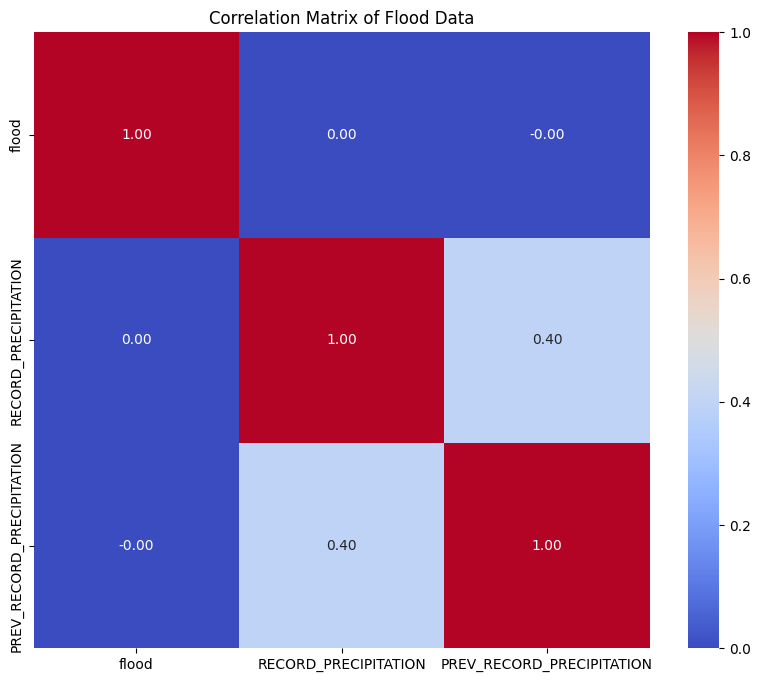

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = combined_data_gdf[['flood', 'RECORD_PRECIPITATION', 'PREV_RECORD_PRECIPITATION']].corr()
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Flood Data')
plt.show()


The matrix indicated that there is no linear relationship. may be we might benefit by using RandomForestClassifier?

## e) Algorithm Selection

We'll use the RandomForestClassifier algorithm from scikit-learn for following reasons:

- Robustness to Overfitting: Random forests are less likely to overfit than a single decision tree due to ensemble learning.
- Handling Non-Linear Relationships: It can capture complex, non-linear relationships between features and the target variable.
- Feature Importance: Random forests can rank the importance of various features in predicting the target variable, providing insights into the underlying processes influencing floods.

## f) Running Algorithm with Hyper parameterization

In this section, we focus on optimizing our RandomForestClassifier model through hyperparameterization, an essential practice in machine learning to enhance model performance. Hyperparameters are the configuration settings used to structure machine learning models. For Random Forest, these settings can include the number of decision trees in the forest (n_estimators), the maximum depth of each tree (max_depth), and the minimum number of samples required to split a node (min_samples_split), among others.

Once we have found the best hyperparameters, we train a new RandomForestClassifier using these optimized settings and predict the outcomes on our test set.

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = combined_data_gdf[['RECORD_PRECIPITATION', 'PREV_RECORD_PRECIPITATION']]  # Features
y = combined_data_gdf['flood']  # Target variable

# Split the data into training and test sets
# Split the data
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    X, y, combined_data_gdf.index, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform the grid search and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the RandomForestClassifier with the best-found hyperparameters
best_rf = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_rf.predict(X_test)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## g) Evaluation of the results

In [78]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9730590961761297
ROC-AUC: 0.2920239958769091
Confusion Matrix:
[[   0   93]
 [   0 3359]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.97      1.00      0.99      3359

    accuracy                           0.97      3452
   macro avg       0.49      0.50      0.49      3452
weighted avg       0.95      0.97      0.96      3452



- The confusion matrix shows that the model predicted no instances of the '0' class (no flood) correctly (True Negatives = 0), and it incorrectly classified all '0' instances as '1' (False Positives = 93). The model predicted all '1' instances correctly (True Positives = 3359), but this is expected since the dataset is heavily imbalanced toward the '1' class.

- The accuracy is high at approximately 97.3%. However, i feel that it might be biased because in  the area of intrest majority is flood.'

- Precision and Recall for Class '0', Both are 0.00 for the '0' class, meaning the model failed to correctly identify any non-flood events. This is problematic because it indicates the model's inability to distinguish the two classes effectively.

The Result might have been better if I had other independent variables.